In [1]:
# Import required libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from stock_price_forecast.data import get_inputs
from stock_price_forecast.preprocess import Preprocess

In [2]:
trained_model = tf.keras.models.load_model('../saved_data/model')

In [3]:
dataset = pd.read_csv('../data/BA daily.csv')
dataset.set_index(pd.to_datetime(dataset["Date"], format="%m/%d/%Y"), inplace = True)
dataset.drop(columns = ["Date", "Adj Close", "Volume"], inplace = True)

prep = Preprocess(p=5, t=25, valid_ratio=0.10)
prep.fit(dataset)
x_train, y_train, x_valid, y_valid, x_train_indeces, x_valid_indeces, y_train_indeces, y_valid_indeces = prep.transform(dataset)

Number of time steps in one entry:  25
Number of predictions in one entry:  5
Total length of one entry:  30
Total number of samples:  9395
Number of samples in training set:  8456
Number of samples in validation set:  939
Training dataset shape:  (8456, 25, 4)
Validation dataset shape:  (939, 25, 4)
Training labels shape:  (8456, 5, 4)
Validation labels shape:  (939, 5, 4)


In [8]:
def predict(x_test, y_test, indeces_x, indeces_y, model):

    pred = model.predict(x_test)
    error = {}

    prices = ["Open", "High", "Low", "Close"]
    colors = ['#BD9DEA', '#EA7186', '#F2C76E', '#7A77B9']
    print(indeces_x.shape)
    print(indeces_y.shapr)

    n = x_test.shape[0] + x_test.shape[1]
    fig, axes = plt.subplots(x_test.shape[0]//2, 1, figsize=(18, 1 * x_test.shape[0]//2))
    for i, price, color in zip(range(y_test.shape[2]), prices, colors):
        error[price] = np.sum((y_test[:, :, i] - pred[:, :, i])**2) / n
        for j in range(x_test.shape[0]//2):
            axes[j].plot(np.hstack(x_test[j, :, i], y_test[j, :, i]), color = color)
            axes[j].plot(np.hstack(x_test[j, :, i], pred[j, :]), color = color)
        axes[j].grid(linewidth = 0.1, color = "#000000")
        axes[j].legend(prices)
    plt.show()
    
    return error

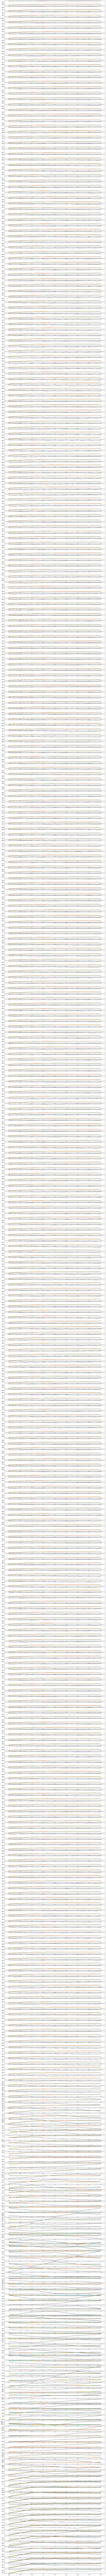

In [9]:
error = predict(x_valid, y_valid, x_valid_indeces, y_valid_indeces, trained_model)

In [ ]:

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'], high=df['AAPL.High'],
                low=df['AAPL.Low'], close=df['AAPL.Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()